# ⭐🐟 GBR Training pipeline ⭐🐟
### By [Luca Ordronneau](https://www.kaggle.com/lucaordronneau)

# 📚 Import Librairies

In [1]:
import os

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 🖇 Import Files

In [2]:
!cp -r ../input/tiles-train-images-valid-preprocessing/images /kaggle/working
!cp -r ../input/tiles-train-images-valid-preprocessing/labels /kaggle/working
!cp -r ../input/tiles-train-images-valid-preprocessing/data.yaml /kaggle/working
!cp -r ../input/tiles-train-images-valid-preprocessing/train.txt /kaggle/working
!cp -r ../input/tiles-train-images-valid-preprocessing/val.txt /kaggle/working

# !cp -r ../input/tiles-train-images-valid-v2/images /kaggle/working
# !cp -r ../input/tiles-train-images-valid-v2/labels /kaggle/working
# !cp -r ../input/tiles-train-images-valid-v2/data.yaml /kaggle/working
# !cp -r ../input/tiles-train-images-valid-v2/train.txt /kaggle/working
# !cp -r ../input/tiles-train-images-valid-v2/val.txt /kaggle/working

# !cp -r ../input/images-train-valid-v2/images /kaggle/working
# !cp -r ../input/images-train-valid-v2/labels /kaggle/working
# !cp -r ../input/images-train-valid-v2/data.yaml /kaggle/working
# !cp -r ../input/images-train-valid-v2/train.txt /kaggle/working
# !cp -r ../input/images-train-valid-v2/val.txt /kaggle/working


# !cp -r ../input/tiles-preprocessing/images /kaggle/working
# !cp -r ../input/tiles-preprocessing/labels /kaggle/working
# !cp -r ../input/tiles-preprocessing/data.yaml /kaggle/working
# !cp -r ../input/tiles-preprocessing/train.txt /kaggle/working
# !cp -r ../input/tiles-preprocessing/val.txt /kaggle/working

# !cp -r ../input/preprocessing/images /kaggle/working
# !cp -r ../input/preprocessing/labels /kaggle/working
# !cp -r ../input/preprocessing/data.yaml /kaggle/working
# !cp -r ../input/preprocessing/train.txt /kaggle/working
# !cp -r ../input/preprocessing/val.txt /kaggle/working

In [3]:
images_list = [os.path.join("/kaggle/working/images/", x) for x in os.listdir("/kaggle/working/images/")]
labels_list = [os.path.join("/kaggle/working/labels/", x) for x in os.listdir("/kaggle/working/labels/")]

In [4]:
print("IMAGES",len(images_list))
print("LABELS",len(labels_list))

IMAGES 6900
LABELS 6900


In [5]:
!wc -l ./train.txt

6294 ./train.txt


In [6]:
!wc -l ./val.txt

606 ./val.txt


## Linking the model training with **WandB** :
<div align=center><img src="https://lever-client-logos.s3.amazonaws.com/bb006941-a5fe-4d4c-b13d-931f9b9c303f-1569362661885.png" width=360></div>

- Track, compare, and visualize ML experiments
- Get live metrics, terminal logs, and system stats streamed to the centralized dashboard.
- Explain how your model works, show graphs of how model versions improved, discuss bugs, and demonstrate progress towards milestones.

In [7]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("API_KEY_WB")

!wandb login $secret_value_0

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Clone of the **YOLOv5** directory for the competition (F2 metric implementation)
<div align=center><img src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png" width=640></div>

In [8]:
!git clone https://github.com/lucaordronneau/yolov5_f2n.git

Cloning into 'yolov5_f2n'...
remote: Enumerating objects: 7818, done.
remote: Counting objects: 100% (7818/7818), done.
remote: Compressing objects: 100% (2467/2467), done.
remote: Total 7818 (delta 5340), reused 7815 (delta 5340), pack-reused 0
Receiving objects: 100% (7818/7818), 10.25 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (5340/5340), done.


## Adjustment of hyperparameters for model training (augmentations)

In [9]:
%%writefile /kaggle/working/yolov5_f2n/data/hyps/hyp.scratch.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.012  # image HSV-Hue augmentation (fraction)
hsv_s: 0.6  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.3  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.15  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.15  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.5  # image mosaic (probability)
mixup: 0.25  # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Overwriting /kaggle/working/yolov5_f2n/data/hyps/hyp.scratch.yaml


# 🚅 Training

In [10]:
!python "/kaggle/working/yolov5_f2n/train.py" --img 1280\
--hyp "/kaggle/working/yolov5_f2n/data/hyps/hyp.scratch.yaml"\
--batch 10\
--epochs 4\
--data "/kaggle/working/data.yaml"\
--weights "yolov5s6.pt"\
--workers 24\
--project "GBR-STARFISH" --name "/kaggle/working/yolo_train"\
--exist-ok

wandb: Currently logged in as: lucaordronneau (use `wandb login --relogin` to force relogin)
train: weights=yolov5s6.pt, cfg=, data=/kaggle/working/data.yaml, hyp=/kaggle/working/yolov5_f2n/data/hyps/hyp.scratch.yaml, epochs=4, batch_size=10, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=GBR-STARFISH, name=/kaggle/working/yolo_train, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/lucaordronneau/yolov5_f2n ✅
YOLOv5 🚀 51e026b torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

In [11]:
!cp -r "/kaggle/working/yolo_train/weights/best.pt" "/kaggle/working/"

# 🔍 Prediction

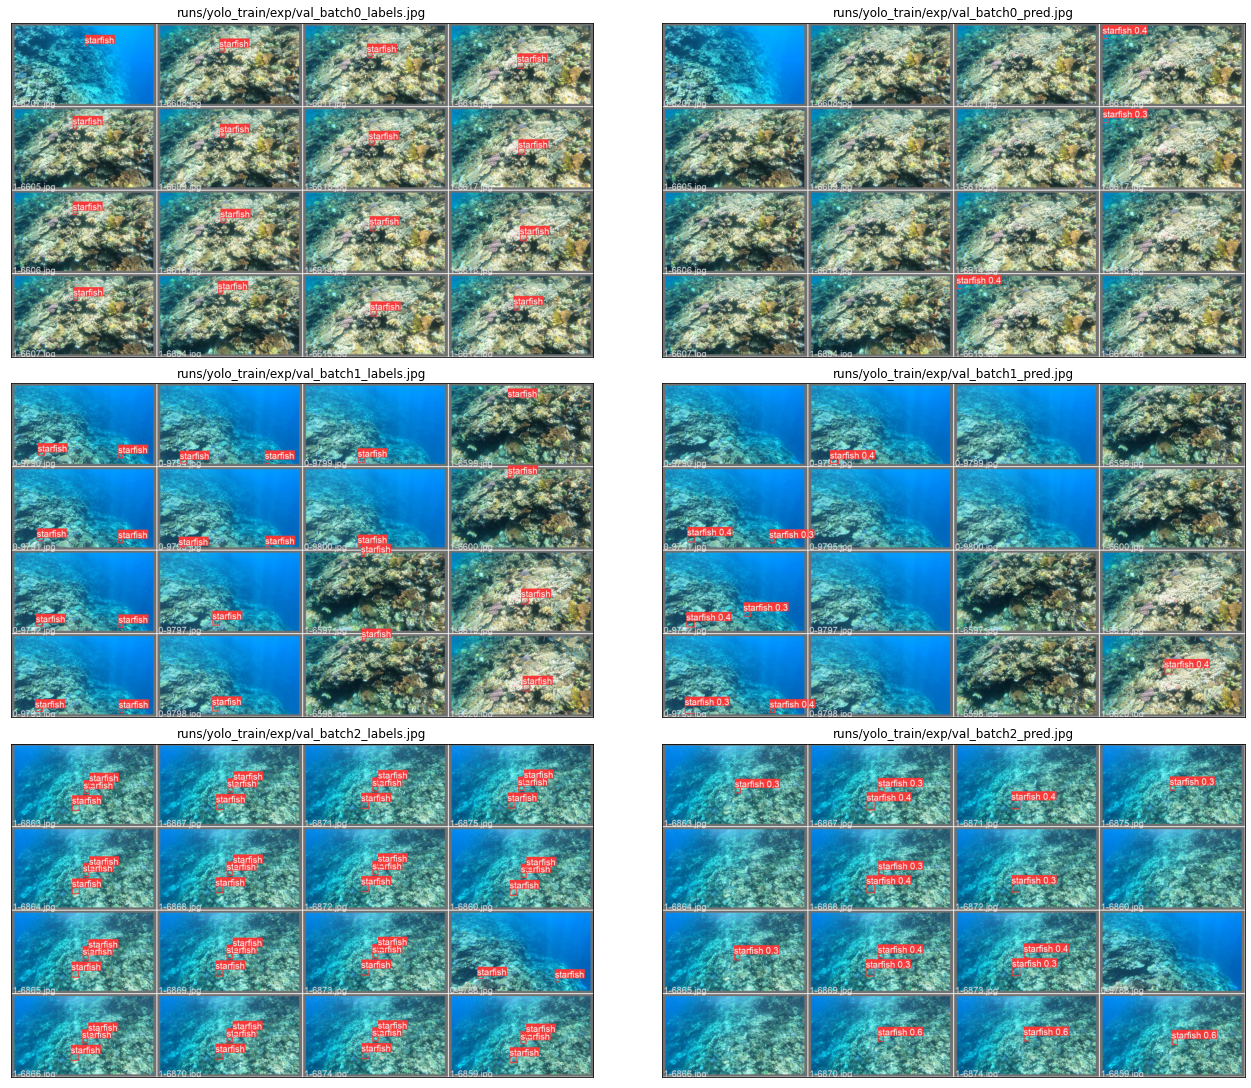

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (2*9,3*5), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(plt.imread(f'./yolo_train/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'runs/yolo_train/exp/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'./yolo_train/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'runs/yolo_train/exp/val_batch{row}_pred.jpg', fontsize = 12)
plt.show()

In [13]:
!rm -rf /kaggle/working/labels
!rm -rf /kaggle/working/images
!rm -rf /kaggle/working/yolo_train
!rm -rf /kaggle/working/wandb
!rm -rf /kaggle/working/yolov5_f2n